<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>Library</p>

In [1]:
# library
import pandas as pd
import numpy as np
from scipy import stats
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>Read DATASET</p>

In [2]:
# connecting to the postgresql
con = psycopg2.connect(database='Student',host='localhost',user='postgres',password='1234',port='5432')
cur = con.cursor()
# For Student Mat
cur.execute('SELECT * FROM studentmat')
# data from postgresql
data = cur.fetchall()
# feature
column_names = [desc[0] for desc in cur.description]
#dataset
df_student_mat = pd.DataFrame(data, columns=column_names)
cur.close()
con.close()

In [3]:
con = psycopg2.connect(database='Student',host='localhost',user='postgres',password='1234',port='5432')
cur = con.cursor()
# For Student Por
cur.execute('SELECT * FROM studentpor')
# data from postgresql
data = cur.fetchall()
# feature
column_names = [desc[0] for desc in cur.description]
#dataset
df_student_por = pd.DataFrame(data, columns=column_names)
cur.close()
con.close()

In [4]:
df_student_por

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
df_student_mat

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>clean and preprocessing data with inforamtion</p>

In [6]:
df_student_por.isna().value_counts()

school  sex    age    address  famsize  pstatus  medu   fedu   mjob   fjob   reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid   activities  nursery  higher  internet  romantic  famrel  freetime  goout  dalc   walc   health  absences  g1     g2     g3   
False   False  False  False    False    False    False  False  False  False  False   False     False       False      False     False      False   False  False       False    False   False     False     False   False     False  False  False  False   False     False  False  False    649
Name: count, dtype: int64

In [7]:
df_student_mat.isna().value_counts()

school  sex    age    address  famsize  pstatus  medu   fedu   mjob   fjob   reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid   activities  nursery  higher  internet  romantic  famrel  freetime  goout  dalc   walc   health  absences  g1     g2     g3   
False   False  False  False    False    False    False  False  False  False  False   False     False       False      False     False      False   False  False       False    False   False     False     False   False     False  False  False  False   False     False  False  False    395
Name: count, dtype: int64

In [8]:
df_student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   medu        395 non-null    int64 
 7   fedu        395 non-null    int64 
 8   mjob        395 non-null    object
 9   fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df_student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   pstatus     649 non-null    object
 6   medu        649 non-null    int64 
 7   fedu        649 non-null    int64 
 8   mjob        649 non-null    object
 9   fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>Descriptive statistics</p>

In [10]:
# mean and std and min and max for mat
desc_m = df_student_mat.describe()
desc_m

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
# mean and std and min and max for por
desc_p = df_student_por.describe()
desc_p

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [12]:
fea_mat_num = df_student_mat.select_dtypes(include='number')
fea_por_num = df_student_por.select_dtypes(include='number')

In [13]:
# Var Mat
fea_mat_num.var()

age            1.628285
medu           1.198445
fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
dalc           0.793420
walc           1.658678
health         1.932944
absences      64.049541
g1            11.017053
g2            14.148917
g3            20.989616
dtype: float64

In [14]:
# Var por
fea_por_num.var()

age            1.483859
medu           1.287208
fedu           1.209848
traveltime     0.560492
studytime      0.688086
failures       0.351928
famrel         0.913395
freetime       1.104796
goout          1.382426
dalc           0.855319
walc           1.649632
health         2.091665
absences      21.536642
g1             7.536481
g2             8.489290
g3            10.437140
dtype: float64

In [15]:
#range Mat
_range = {}
for i in fea_mat_num.columns:
       _range.update({i:float(np.max(df_student_mat[i]) - np.min(df_student_mat[i]))})
range_student_mat = pd.DataFrame(_range,index=[0])
range_student_mat

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,7.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,75.0,16.0,19.0,20.0


In [16]:
#range Por
_range = {}
for i in fea_por_num.columns:
       _range.update({i:float(np.max(df_student_por[i]) - np.min(df_student_por[i]))})
range_student_por = pd.DataFrame(_range,index=[0])
range_student_por

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,7.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,32.0,19.0,19.0,19.0


In [17]:
# IQR Mat
_range = {}
for i in fea_mat_num.columns:
       _range.update({i:stats.iqr(df_student_mat[i])})
iqr_student_mat = pd.DataFrame(_range,index=[0])
iqr_student_mat

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,8.0,5.0,4.0,6.0


In [18]:
# IQR Por
_range = {}
for i in fea_por_num.columns:
       _range.update({i:stats.iqr(df_student_por[i])})
iqr_student_por = pd.DataFrame(_range,index=[0])
iqr_student_por

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,3.0,6.0,3.0,3.0,4.0


In [19]:
#Median Mat
median_student_mat = fea_mat_num.median()
median_student_mat

age           17.0
medu           3.0
fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
dalc           1.0
walc           2.0
health         4.0
absences       4.0
g1            11.0
g2            11.0
g3            11.0
dtype: float64

In [20]:
#Median Por
median_student_por = fea_por_num.median()
median_student_por

age           17.0
medu           2.0
fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
dalc           1.0
walc           2.0
health         4.0
absences       2.0
g1            11.0
g2            11.0
g3            12.0
dtype: float64

In [21]:
# mode mat
mode_result = stats.mode(fea_mat_num)
mode_student_mat = pd.DataFrame(mode_result,columns=fea_mat_num.columns,index=['mode','count'])
mode_student_mat

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
mode,16,4,2,1,2,0,4,3,3,1,1,5,0,10,9,10
count,104,131,115,257,198,312,195,157,130,276,151,146,115,51,50,56


In [22]:
# mode por
mode_result = stats.mode(fea_por_num)
mode_student_por = pd.DataFrame(mode_result,columns=fea_por_num.columns,index=['mode','count'])
mode_student_por

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
mode,17,2,2,1,2,0,4,3,3,1,1,5,0,10,11,11
count,179,186,209,366,305,549,317,251,205,451,247,249,244,95,103,104


<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>Inferential statistics</p>

In [23]:
# correlation mat
fea_mat_num.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [24]:
# correlation por
fea_por_num.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>chart</p>

In [25]:
plt.style.use('dark_background')

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\2935205310.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


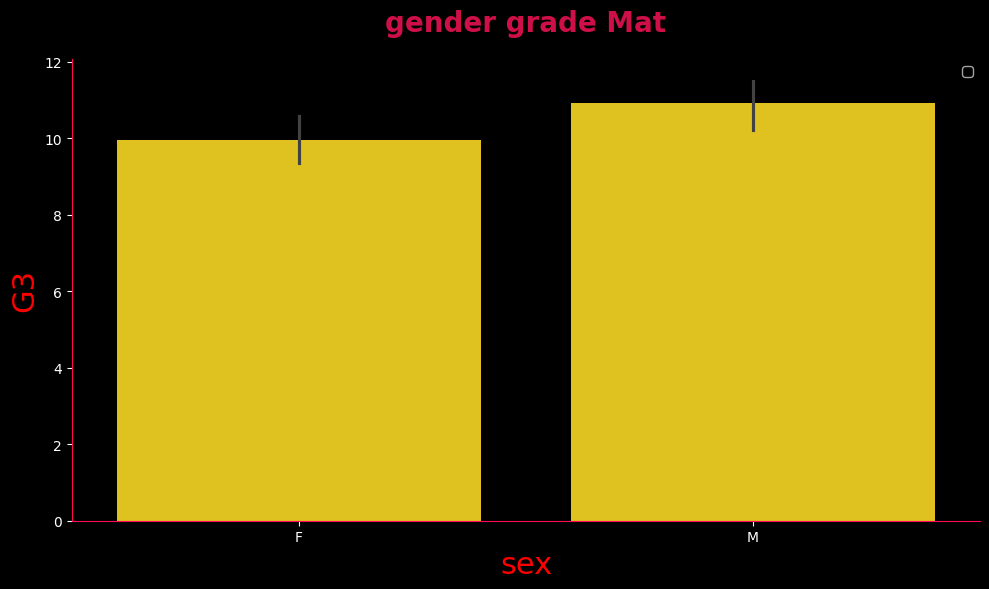

In [26]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_student_mat,x='sex',y='g3',color='gold')
ax.set_title("gender grade Mat",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('sex',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
plt.legend()
plt.tight_layout()

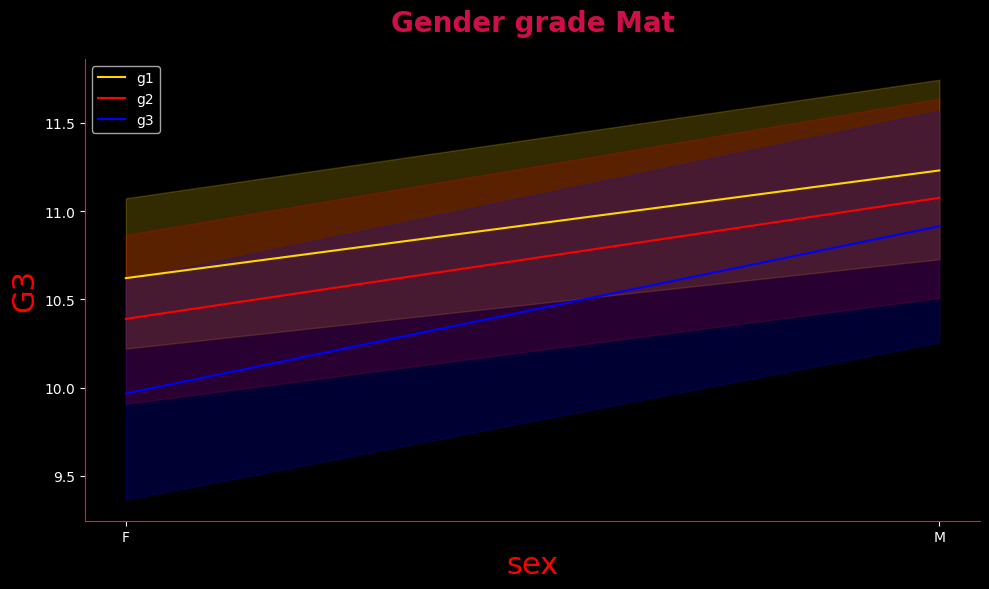

In [27]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_student_mat,x='sex',y='g1',color='gold',label='g1')
sns.lineplot(data=df_student_mat,x='sex',y='g2',color='red',label='g2')
sns.lineplot(data=df_student_mat,x='sex',y='g3',color='blue',label='g3')
ax.set_title("Gender grade Mat",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('sex',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
plt.legend()
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\33199531.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


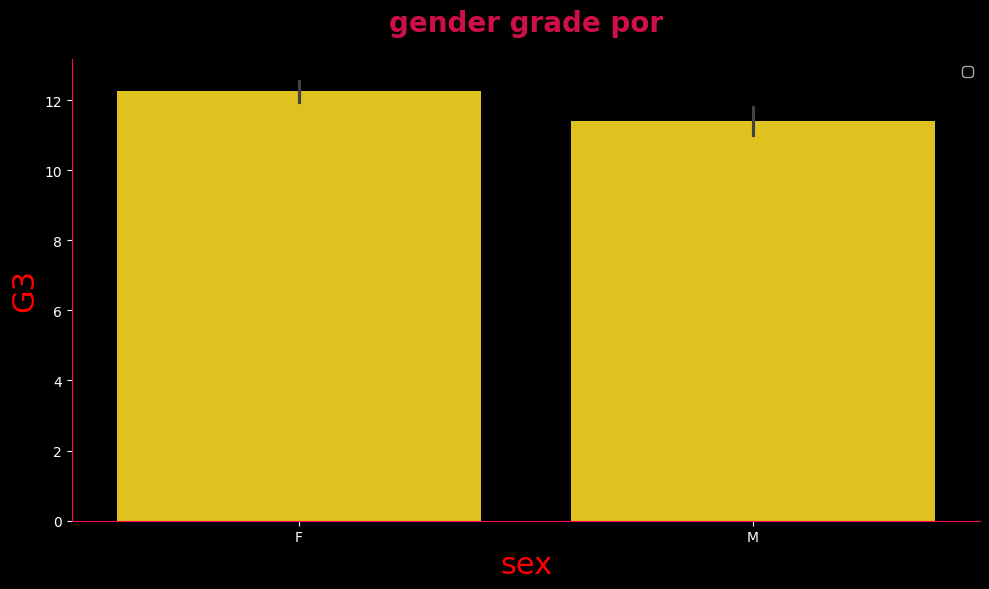

In [28]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_student_por,x='sex',y='g3',color='gold')
ax.set_title("gender grade por",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('sex',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
plt.legend()
plt.tight_layout()

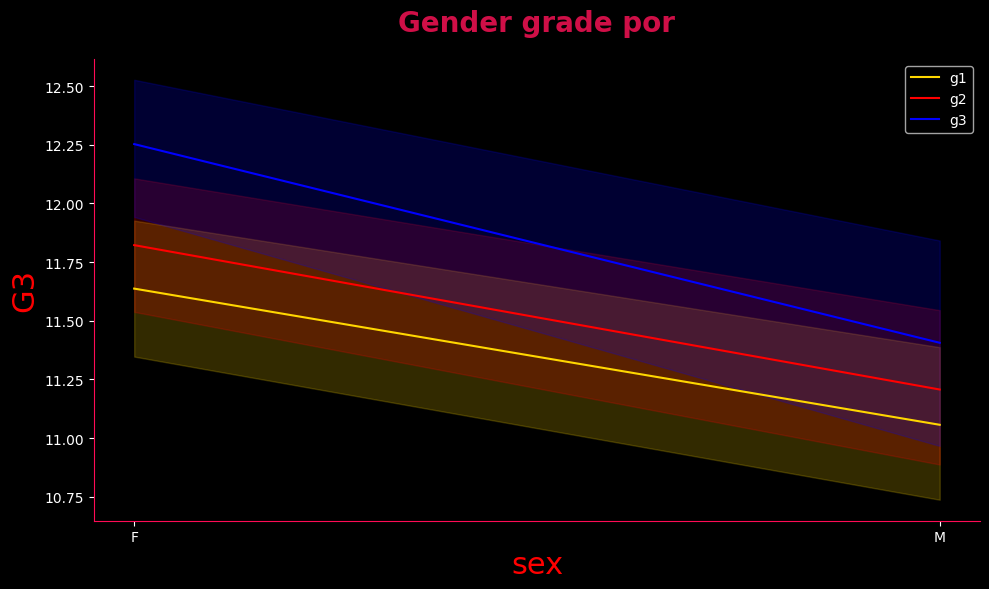

In [29]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_student_por,x='sex',y='g1',color='gold',label='g1')
sns.lineplot(data=df_student_por,x='sex',y='g2',color='red',label='g2')
sns.lineplot(data=df_student_por,x='sex',y='g3',color='blue',label='g3')
ax.set_title("Gender grade por",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('sex',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
plt.legend()
plt.tight_layout()

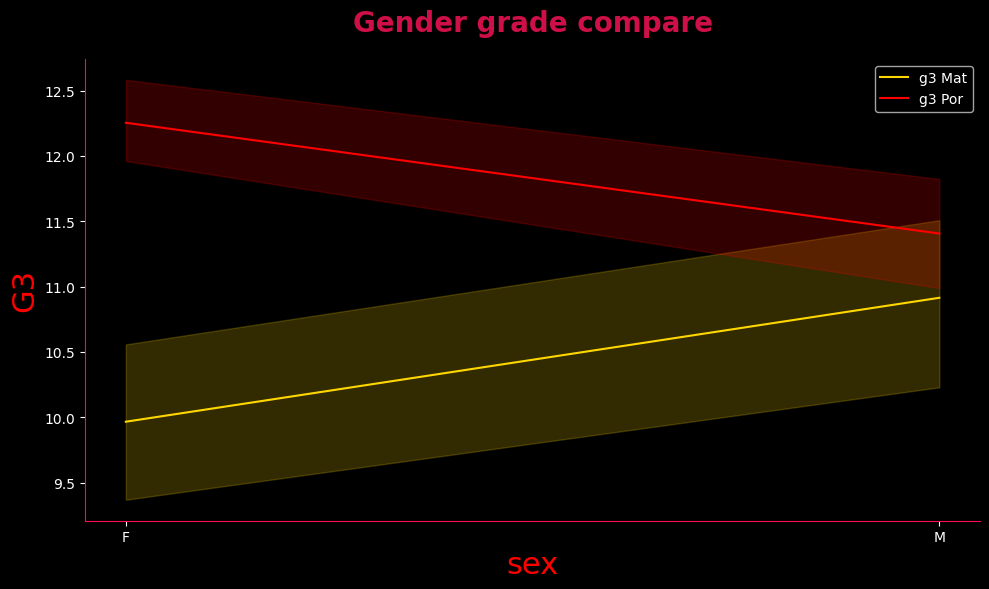

In [30]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_student_mat,x='sex',y='g3',color='gold',label='g3 Mat')
sns.lineplot(data=df_student_por,x='sex',y='g3',color='red',label='g3 Por')
ax.set_title("Gender grade compare",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('sex',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
plt.legend()
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\1013000123.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=fea_por_num.columns, rotation=25, ha='right',color='Beige')


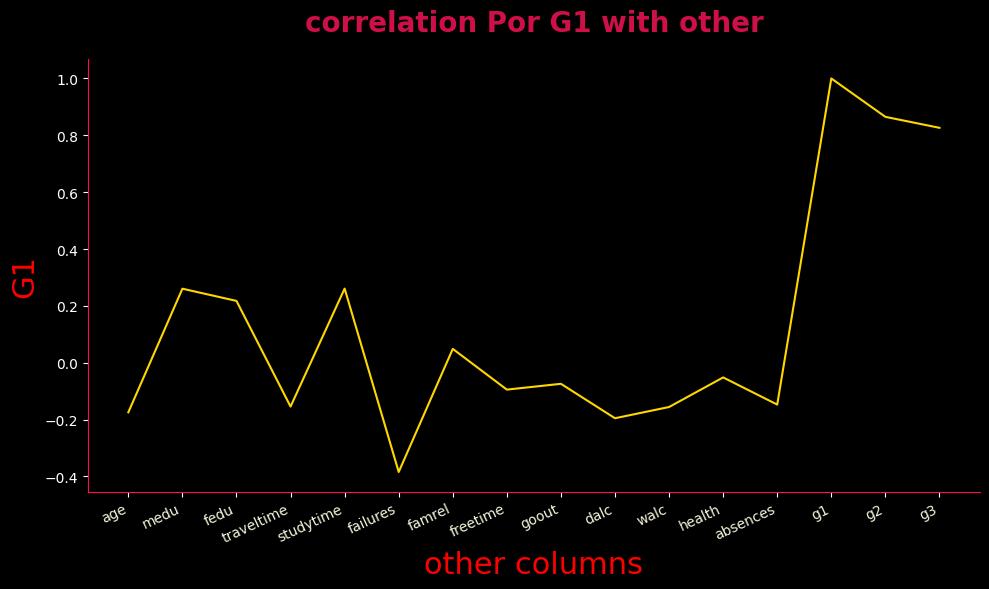

In [31]:
# correlation for Por
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=fea_por_num.corr()['g1'],color='gold')
ax.set_title("correlation Por G1 with other",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('other columns',color='red',fontsize=22)
ax.set_ylabel('G1',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
ax.set_xticklabels(labels=fea_por_num.columns, rotation=25, ha='right',color='Beige')
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\2151683466.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=fea_por_num.columns, rotation=25, ha='right',color='Beige')


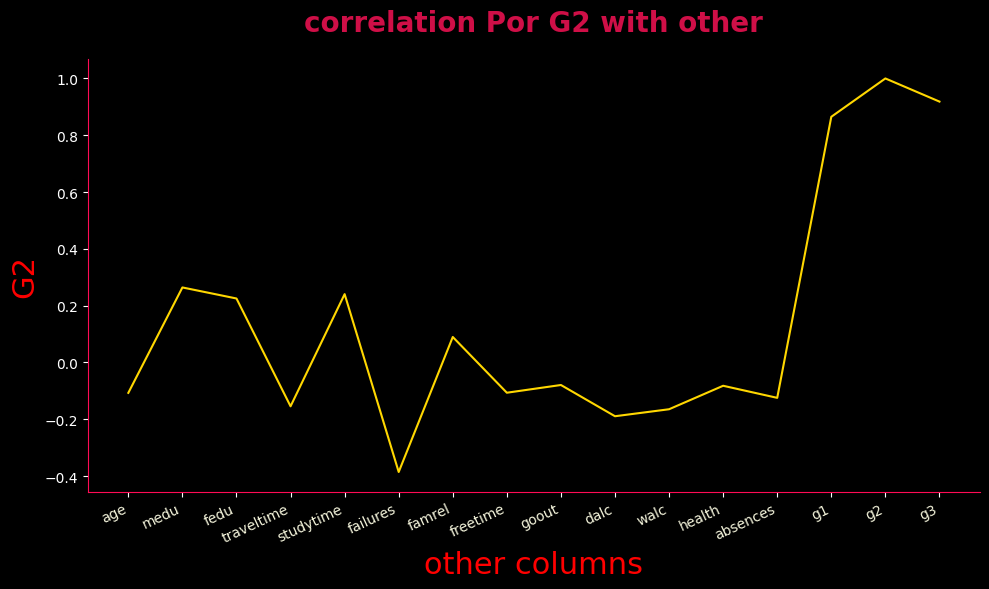

In [32]:
# por
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=fea_por_num.corr()['g2'],color='gold')
ax.set_title("correlation Por G2 with other",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('other columns',color='red',fontsize=22)
ax.set_ylabel('G2',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
ax.set_xticklabels(labels=fea_por_num.columns, rotation=25, ha='right',color='Beige')
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\3092717476.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=fea_por_num.columns, rotation=25, ha='right',color='Beige')


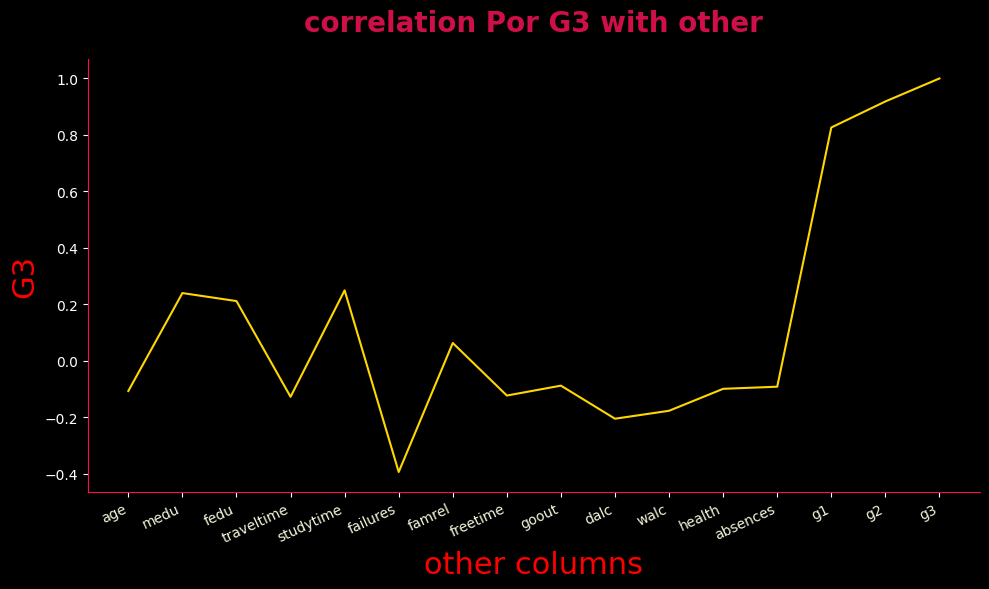

In [33]:
# por
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=fea_por_num.corr()['g3'],color='gold')
ax.set_title("correlation Por G3 with other",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('other columns',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
ax.set_xticklabels(labels=fea_por_num.columns, rotation=25, ha='right',color='Beige')
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\834339884.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=fea_mat_num.columns, rotation=25, ha='right',color='Beige')


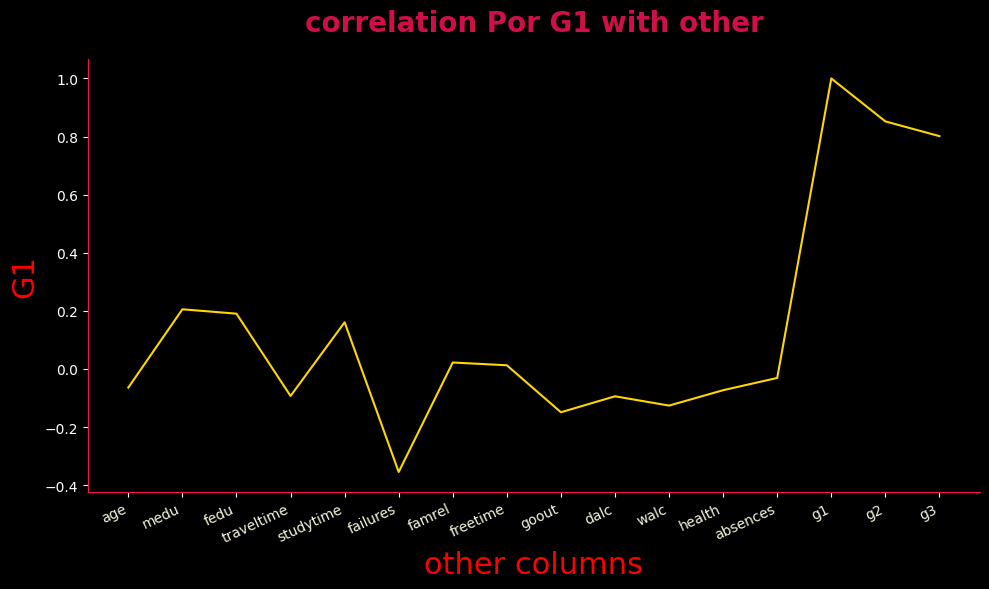

In [34]:
# correlation for mat
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=fea_mat_num.corr()['g1'],color='gold')
ax.set_title("correlation Por G1 with other",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('other columns',color='red',fontsize=22)
ax.set_ylabel('G1',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
ax.set_xticklabels(labels=fea_mat_num.columns, rotation=25, ha='right',color='Beige')
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\777292042.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=fea_mat_num.columns, rotation=25, ha='right',color='Beige')


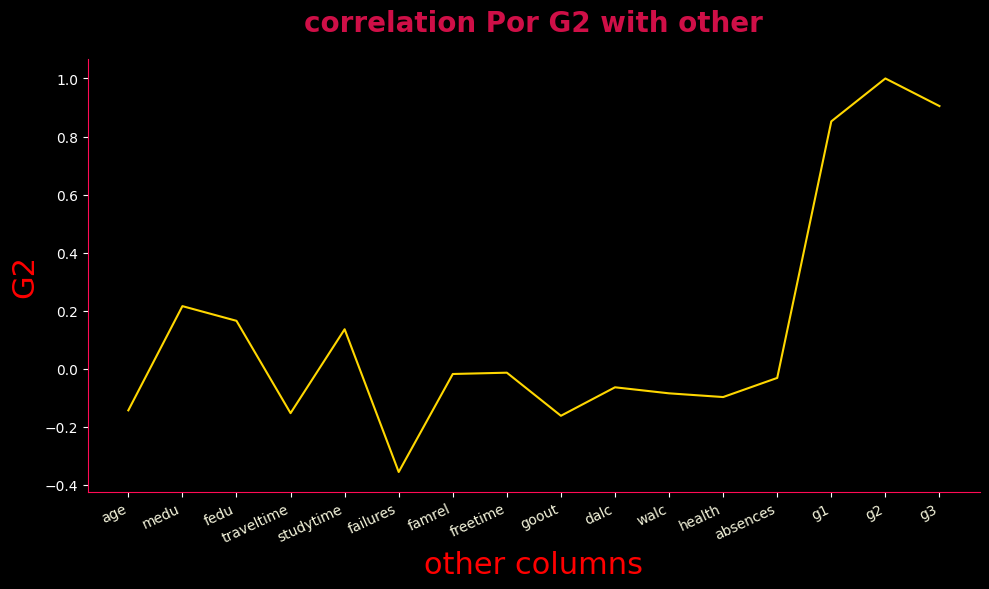

In [35]:
# correlation for mat
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=fea_mat_num.corr()['g2'],color='gold')
ax.set_title("correlation Por G2 with other",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('other columns',color='red',fontsize=22)
ax.set_ylabel('G2',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
ax.set_xticklabels(labels=fea_mat_num.columns, rotation=25, ha='right',color='Beige')
plt.tight_layout()

C:\Users\Mr.Ghost\AppData\Local\Temp\ipykernel_11068\2597686020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=fea_mat_num.columns, rotation=25, ha='right',color='Beige')


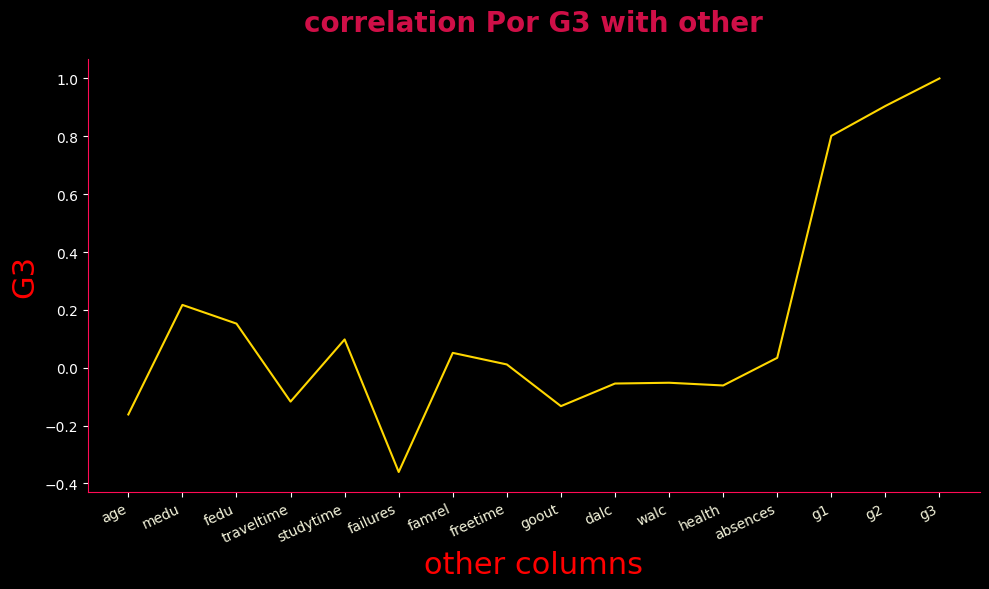

In [36]:
# correlation for mat
fig,ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=fea_mat_num.corr()['g3'],color='gold')
ax.set_title("correlation Por G3 with other",fontsize=20,loc='center',pad=20,weight='bold',color='#CF0F47')
ax.set_xlabel('other columns',color='red',fontsize=22)
ax.set_ylabel('G3',color='red',fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#FF0B55')
ax.spines['bottom'].set_color('#FF0B55')
ax.set_xticklabels(labels=fea_mat_num.columns, rotation=25, ha='right',color='Beige')
plt.tight_layout()

<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>Preprocessing and using a ML mode</p>

<p style='background-color:black;color:green;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:25px;font-weight:bold;text-align:center'>Mat</p>

In [37]:
# For Mat
df_st_mat = df_student_mat.copy()
# Encoding
encoder = LabelEncoder()
for i in df_st_mat.select_dtypes(include='object'):
       df_st_mat[i] = encoder.fit_transform(df_st_mat[i])
       df_st_mat_encoded = df_st_mat.drop(i,axis=1)

In [38]:
# train test split
X = df_st_mat.iloc[:,0:-1]
y = df_st_mat['g3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
# Our ML model (LinearRegression)
model_lin_mat = LinearRegression()
model_lin_mat.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
acc_lin_mat = model_lin_mat.score(X_test,y_test)
print(f'Accuracy LinearRegression Mat: {acc_lin_mat:.2f}')

Accuracy LinearRegression Mat: 0.75


In [41]:
# test
pre_lin_mat = model_lin_mat.predict(np.array(X_test.iloc[0]).reshape(1,-1))

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
print(f'the predicted g3 is {pre_lin_mat[0]:.2f}')

the predicted g3 is 6.28


<p style='background-color:black;color:green;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:25px;font-weight:bold;text-align:center'>User insert input for mat (predict)</p>

In [43]:
# train test split
X = df_st_mat[[
       'school',
       'sex',
       'age',
       'studytime',
       'failures',
       'schoolsup', 
       'famsup', 
       'paid', 
       'activities',
       'internet', 
       'romantic',
       'freetime', 
       'goout',  
       'health', 
       'absences',
       'g1',
       'g2'    
]]

y = df_st_mat['g3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Our ML model (LinearRegression)
model_lin_mat = LinearRegression()
model_lin_mat.fit(X_train,y_train)
acc_lin_mat = model_lin_mat.score(X_test,y_test)
print(f'Accuracy LinearRegression Mat: {acc_lin_mat:.2f}')

Accuracy LinearRegression Mat: 0.75


In [44]:
# student's school (GP=0,MS=1)
school = 1
# student's gender (F=0,M=1)
sex = 0
# age [16, 18, 17, 19, 15, 22, 20, 21]
age = 13
# weekly study time [2, 1, 3, 4]
studytime = 1
# number of past class failures [0, 3, 1, 2]
failures = 1
# extra educational support (0=No,1=Yes)
schoolsup = 1
# family support (0=No,1=Yes)
famsup = 1
# extra paid classes within the course subject (0=No,1=Yes)
paid = 1 
# extra-curricular activities (0=No,1=Yes)
activities = 0
# Internet access at home (0=No,1=Yes)
internet = 0
# with a romantic relationship (0=No,1=Yes)
romantic  = 1
# free time after school [2, 3, 4, 1, 5]
# (numeric: from 1 -> very low to 5 -> very high)
freetime = 2
#going out with friends [3, 5, 4, 2, 1] 
#(numeric: from 1 - very low to 5 - very high)
goout = 1
# current health status [3, 4, 5, 1, 2]
# (numeric: from 1 - very bad to 5 - very good)
health = 3
# number of school absences 
# (numeric: from 0 to 93)
# [ 2,  0, 16,  7, 11, 23,  4, 10,  6, 13,  8, 20, 12,  5, 14, 19,  3,9,  1, 24, 26, 18, 30, 56, 15, 22, 17, 54, 21, 25, 28, 40, 75]
absences = 2
# first period grade (numeric: from 0 to 20)
g1 = 15
# second period grade (numeric: from 0 to 20)
g2 = 11
pre_lin_mat = model_lin_mat.predict(np.array([school,sex,age,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,freetime,goout,health,absences,g1,g2]).reshape(1,-1))

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
print(f'the predicted g3 is {pre_lin_mat[0]:.2f}')

the predicted g3 is 11.84


<p style='background-color:black;color:green;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:25px;font-weight:bold;text-align:center'>Por</p>

In [46]:
# For Por
df_st_por = df_student_por.copy()
# Encoding
encoder = LabelEncoder()
for i in df_st_por.select_dtypes(include='object'):
       df_st_por[i] = encoder.fit_transform(df_st_por[i])
       df_st_por_encoded = df_st_por.drop(i,axis=1)

In [47]:
# train test split
X = df_st_por.iloc[:,0:-1]
y = df_st_por['g3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [48]:
# Our ML model (LinearRegression)
model_lin_por = LinearRegression()
model_lin_por.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
acc_lin_mat = model_lin_por.score(X_test,y_test)
print(f'Accuracy LinearRegression Mat: {acc_lin_mat:.2f}')

Accuracy LinearRegression Mat: 0.85


In [50]:
# test
pre_lin_por = model_lin_por.predict(np.array(X_test.iloc[0]).reshape(1,-1))

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
print(f'the predicted g3 is {pre_lin_mat[0]:.2f}')

the predicted g3 is 11.84


<p style='background-color:black;color:green;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:25px;font-weight:bold;text-align:center'>User insert input for por (predict)</p>

In [52]:
# train test split
X = df_st_por[[
       'school',
       'sex',
       'age',
       'studytime',
       'failures',
       'schoolsup', 
       'famsup', 
       'paid', 
       'activities',
       'internet', 
       'romantic',
       'freetime', 
       'goout',  
       'health', 
       'absences',
       'g1',
       'g2'    
]]

y = df_st_por['g3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Our ML model (LinearRegression)
model_lin_por = LinearRegression()
model_lin_por.fit(X_train,y_train)
acc_lin_por = model_lin_por.score(X_test,y_test)
print(f'Accuracy LinearRegression Mat: {acc_lin_por:.2f}')

Accuracy LinearRegression Mat: 0.86


In [53]:
# student's school (GP=0,MS=1)
school = 0
# student's gender (F=0,M=1)
sex = 1
# age [16, 18, 17, 19, 15, 22, 20, 21]
age = 12
# weekly study time [2, 1, 3, 4]
studytime = 2
# number of past class failures [0, 3, 1, 2]
failures = 3
# extra educational support (0=No,1=Yes)
schoolsup = 0
# extra educational support (0=No,1=Yes)
famsup = 1
# extra paid classes within the course subject (0=No,1=Yes)
paid = 1 
# extra-curricular activities (0=No,1=Yes)
activities = 1
# Internet access at home (0=No,1=Yes)
internet = 1
# with a romantic relationship (0=No,1=Yes)
romantic  = 0
# free time after school [2, 3, 4, 1, 5]
# (numeric: from 1 -> very low to 5 -> very high)
freetime = 3
#going out with friends [3, 5, 4, 2, 1] 
#(numeric: from 1 - very low to 5 - very high)
goout = 2
# current health status [3, 4, 5, 1, 2]
# (numeric: from 1 - very bad to 5 - very good)
health = 4
# number of school absences 
# (numeric: from 0 to 93)
# [ 2,  0, 16,  7, 11, 23,  4, 10,  6, 13,  8, 20, 12,  5, 14, 19,  3,9,  1, 24, 26, 18, 30, 56, 15, 22, 17, 54, 21, 25, 28, 40, 75]
absences = 2
# first period grade (numeric: from 0 to 20)
g1 = 13
# second period grade (numeric: from 0 to 20)
g2 = 20
pre_lin_por = model_lin_por.predict(np.array([school,sex,age,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,freetime,goout,health,absences,g1,g2]).reshape(1,-1))

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
print(f'the predicted g3 is {pre_lin_por[0]:.2f}')

the predicted g3 is 18.82


<p style='background-color:gold;color:black;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:3rem;font-weight:bold;'>Classification</p>

> classification for mat

In [55]:
# classsification for mat
df_st_mat_fail_pas = df_st_mat.copy()
df_st_mat_fail_pas["performance"] = 'Pass'
df_st_mat_fail_pas.loc[df_st_mat_fail_pas['g3']<=9,'performance'] = 'Fail'
df_st_mat_fail_pas

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,performance
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,Fail
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,Fail
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,Pass
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,Pass
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,4,4,5,4,11,9,9,9,Fail
391,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,3,14,16,16,Pass
392,1,1,21,0,0,1,1,1,2,2,...,5,3,3,3,3,3,10,8,7,Fail
393,1,1,18,0,1,1,3,2,3,2,...,4,1,3,4,5,0,11,12,10,Pass


In [56]:
# Encoding
encoder = LabelEncoder()
df_st_mat_fail_pas['performance'] = df_st_mat_fail_pas['performance']
df_st_mat_fail_pas['performance'] = encoder.fit_transform(df_st_mat_fail_pas['performance'])
df_encoded_mat = df_st_mat_fail_pas.drop('g3',axis=1)
df_encoded_mat

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,performance
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,0
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,1
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,0
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,1


In [57]:
# train test split
X = df_st_mat_fail_pas.iloc[:,0:-1]
y = df_st_mat_fail_pas['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Our ML model
model_class_mat = LogisticRegression()
# fit model to data
model_class_mat.fit(X_train,y_train)

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
acc_mat_classification = model_class_mat.score(X_test,y_test)
print(f"Accuracy: {acc_mat_classification:.2f}")

Accuracy: 1.00


In [60]:
# G3 Classes encoded
classes = {0:'Fail',1:'Pass'}
#test
test = np.array(X_test.iloc[0]).reshape(1,-1)
pre = model_class_mat.predict(test)

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
print(f"The predicted fail/pass for mat is: {classes[pre[0]]}")

The predicted fail/pass for mat is: Pass


<p style='background-color:black;color:green;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:25px;font-weight:bold;text-align:center'>User insert input for Mat (predict)</p>

In [62]:
X = df_st_mat_fail_pas[[
       'school',
       'sex',
       'age',
       'studytime',
       'failures',
       'schoolsup', 
       'famsup', 
       'paid', 
       'activities',
       'internet', 
       'romantic',
       'freetime', 
       'goout',  
       'health', 
       'absences',
       'g1',
       'g2'    
]]
y = df_st_mat_fail_pas['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Our ML model
model_class_mat = LogisticRegression()
# fit model to data
model_class_mat.fit(X_train,y_train)
acc_mat_classification = model_class_mat.score(X_test,y_test)
print(f"Accuracy: {acc_mat_classification:.2f}")

Accuracy: 0.89


c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# student's school (GP=0,MS=1)
school = 0
# student's gender (F=0,M=1)
sex = 1
# age [16, 18, 17, 19, 15, 22, 20, 21]
age = 12
# weekly study time [2, 1, 3, 4]
studytime = 2
# number of past class failures [0, 3, 1, 2]
failures = 3
# extra educational support (0=No,1=Yes)
schoolsup = 0
# extra educational support (0=No,1=Yes)
famsup = 1
# extra paid classes within the course subject (0=No,1=Yes)
paid = 1 
# extra-curricular activities (0=No,1=Yes)
activities = 1
# Internet access at home (0=No,1=Yes)
internet = 1
# with a romantic relationship (0=No,1=Yes)
romantic  = 0
# free time after school [2, 3, 4, 1, 5]
# (numeric: from 1 -> very low to 5 -> very high)
freetime = 3
#going out with friends [3, 5, 4, 2, 1] 
#(numeric: from 1 - very low to 5 - very high)
goout = 2
# current health status [3, 4, 5, 1, 2]
# (numeric: from 1 - very bad to 5 - very good)
health = 4
# number of school absences 
# (numeric: from 0 to 93)
# [ 2,  0, 16,  7, 11, 23,  4, 10,  6, 13,  8, 20, 12,  5, 14, 19,  3,9,  1, 24, 26, 18, 30, 56, 15, 22, 17, 54, 21, 25, 28, 40, 75]
absences = 2
# first period grade (numeric: from 0 to 20)
g1 = 13
# second period grade (numeric: from 0 to 20)
g2 = 20
pre_class_mat = model_class_mat.predict(np.array([school,sex,age,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,freetime,goout,health,absences,g1,g2]).reshape(1,-1))

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [64]:
print(f"The predicted student for mat is: {classes[pre_class_mat[0]]}")

The predicted student for mat is: Pass


> classification for por

In [65]:
df_st_por_fail_pas = df_st_por.copy()
df_st_por_fail_pas["performance"] = 'Pass'
df_st_por_fail_pas.loc[df_st_por_fail_pas['g3']<=9,'performance'] = 'Fail'
df_st_por_fail_pas

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,performance
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,Pass
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,Pass
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,Pass
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,Pass
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,10,Pass
645,1,0,18,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,16,Pass
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,5,6,11,12,9,Fail
647,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,10,Pass


In [66]:
# Encoding
encoder = LabelEncoder()
df_st_por_fail_pas['performance'] = df_st_por_fail_pas['performance']
df_st_por_fail_pas['performance'] = encoder.fit_transform(df_st_por_fail_pas['performance'])
df_encoded_por = df_st_por_fail_pas.drop('g3',axis=1)
df_encoded_por

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,performance
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,0
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


In [67]:
# train test split
X = df_st_por_fail_pas.iloc[:,0:-1]
y = df_st_por_fail_pas['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Our ML model
model_class_por = LogisticRegression()
# fit model to data
model_class_por.fit(X_train,y_train)

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
acc_por_classification = model_class_por.score(X_test,y_test)
print(f"Accuracy: {acc_por_classification:.2f}")

Accuracy: 1.00


In [ ]:
# G3 Classes encoded
classes = {0:'Fail',1:'Pass'}
#test
test = np.array(X_test.iloc[0]).reshape(1,-1)
pre = model_class_por.predict(test)

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
print(f"The predicted fail/pass for por is: {classes[pre[0]]}")

The predicted fail/pass for por is: Pass


<p style='background-color:black;color:green;padding:2rem;border-radius:1rem;border:0.5px solid snow;font-size:25px;font-weight:bold;text-align:center'>User insert input for Por (predict)</p>

In [72]:
X = df_st_por_fail_pas[[
       'school',
       'sex',
       'age',
       'studytime',
       'failures',
       'schoolsup', 
       'famsup', 
       'paid', 
       'activities',
       'internet', 
       'romantic',
       'freetime', 
       'goout',  
       'health', 
       'absences',
       'g1',
       'g2'    
]]
y = df_st_por_fail_pas['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Our ML model
model_class_por = LogisticRegression()
# fit model to data
model_class_por.fit(X_train,y_train)
acc_por_classification = model_class_por.score(X_test,y_test)


c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print(f"Accuracy: {acc_por_classification:.2f}")

Accuracy: 0.92


In [74]:
# student's school (GP=0,MS=1)
school = 0
# student's gender (F=0,M=1)
sex = 1
# age [16, 18, 17, 19, 15, 22, 20, 21]
age = 12
# weekly study time [2, 1, 3, 4]
studytime = 2
# number of past class failures [0, 3, 1, 2]
failures = 3
# extra educational support (0=No,1=Yes)
schoolsup = 0
# extra educational support (0=No,1=Yes)
famsup = 1
# extra paid classes within the course subject (0=No,1=Yes)
paid = 1 
# extra-curricular activities (0=No,1=Yes)
activities = 1
# Internet access at home (0=No,1=Yes)
internet = 1
# with a romantic relationship (0=No,1=Yes)
romantic  = 0
# free time after school [2, 3, 4, 1, 5]
# (numeric: from 1 -> very low to 5 -> very high)
freetime = 3
#going out with friends [3, 5, 4, 2, 1] 
#(numeric: from 1 - very low to 5 - very high)
goout = 2
# current health status [3, 4, 5, 1, 2]
# (numeric: from 1 - very bad to 5 - very good)
health = 4
# number of school absences 
# (numeric: from 0 to 93)
# [ 2,  0, 16,  7, 11, 23,  4, 10,  6, 13,  8, 20, 12,  5, 14, 19,  3,9,  1, 24, 26, 18, 30, 56, 15, 22, 17, 54, 21, 25, 28, 40, 75]
absences = 2
# first period grade (numeric: from 0 to 20)
g1 = 13
# second period grade (numeric: from 0 to 20)
g2 = 20
pre_class_por = model_class_por.predict(np.array([school,sex,age,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,freetime,goout,health,absences,g1,g2]).reshape(1,-1))

c:\Users\Mr.Ghost\Desktop\data analyst daneshkar\Final Proj2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [75]:
print(f"The predicted student for por is: {classes[pre_class_por[0]]}")

The predicted student for por is: Pass
